In [9]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

# Load Data

In [42]:
X_train = pd.read_pickle('./datasets/heart_disease/X_train_scaled.pkl')
y_train = pd.read_pickle('./datasets/heart_disease/y_train_scaled.pkl')
X_test = pd.read_pickle('./datasets/heart_disease/X_test_scaled.pkl')
y_test = pd.read_pickle('./datasets/heart_disease/y_test_scaled.pkl')

In [44]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
378,1.753540,1,2,0.403985,-1.850065,1.894070,0,0.793140,1,1.055374,1
356,-0.817871,1,2,-0.950506,-1.850065,-0.527964,0,-0.924506,1,0.577847,1
738,1.217829,0,1,1.487578,1.498941,-0.527964,2,0.558916,0,-0.090691,0
85,1.324972,1,2,0.403985,-0.556976,-0.527964,0,-1.666216,1,0.100320,1
427,0.574977,1,2,0.403985,-1.850065,-0.527964,1,-0.768356,1,0.100320,1


# Train KNN

### Baseline

Validation Accuracy: 0.885
Test Accuracy: 0.813
F1 Score: 0.847


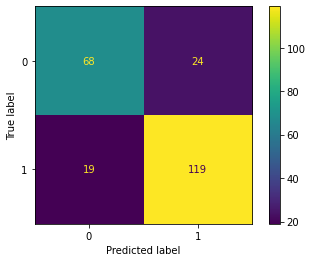

In [4]:
# Baseline model
clf = KNeighborsClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Print accuracy
print(f'Validation Accuracy: {clf.score(X_train, y_train):.3f}')
print(f'Test Accuracy: {clf.score(X_test, y_test):.3f}')
print(f'F1 Score: {f1_score(y_test, y_pred):.3f}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()

# Grid search

Fitting 5 folds for each of 120000 candidates, totalling 600000 fits
Runtime:133.3535017967224
Best Score: 0.893
Best Parameters
{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Validation Accuracy: 1.000
Test Accuracy: 0.888
F1 Score: 0.888


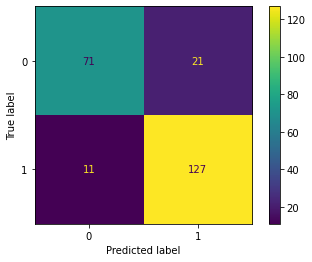

In [8]:
parameters = {
    'n_neighbors': [i for i in range(1, 101)],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [i for i in range(1, 101)],
    'p': [1, 2],
}

knn = KNeighborsClassifier()

start_time = time.time()

clf = GridSearchCV(estimator=knn, 
                   param_grid=parameters, 
                   scoring='f1',
                   verbose=1,
                   n_jobs=-1).fit(X_train, y_train)

df = pd.DataFrame(clf.cv_results_)
df.tail()
df.to_csv('./results/hd/results_hd_knn.csv', index=False)

print(f'Runtime:{time.time() - start_time}')
print(f'Best Score: {clf.best_score_:.3f}')
print('Best Parameters')
print(clf.best_params_)

y_pred = clf.predict(X_test)

# Print accuracy
print(f'Validation Accuracy: {clf.score(X_train, y_train):.3f}')
print(f'Test Accuracy: {clf.score(X_test, y_test):.3f}')
print(f'F1 Score: {f1_score(y_test, y_pred):.3f}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()

# Final Graphs

/home/nathan/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/nathan/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/nathan/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/home/nathan/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 262, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/nathan/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/nathan/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/n

/home/nathan/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/nathan/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/nathan/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/home/nathan/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 262, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/nathan/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/nathan/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/n

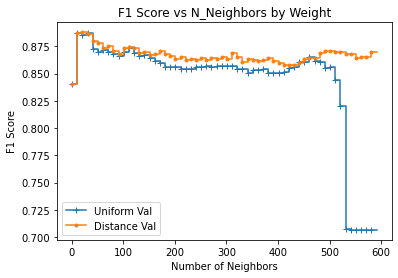

In [48]:
# Max neighbors
max_n = 701

train_uniform = []
test_uniform = []
train_distance = []
test_distance = []

for i in range(1, max_n, 10):
    # Uniform
    scores = cross_validate(estimator=KNeighborsClassifier(n_neighbors=i,
                                                           weights='uniform',
                                                           p=1),
                            X=X_train, 
                            y=y_train,
                            scoring='f1',
                            return_train_score=True,
                            return_estimator=True,
                            n_jobs=-1)

    # Append scores
    train_uniform.append(scores['train_score'].mean())
    test_uniform.append(scores['test_score'].mean())
    
    # Distance
    scores = cross_validate(estimator=KNeighborsClassifier(n_neighbors=i,
                                                           weights='distance',
                                                           p=1),
                            X=X_train, 
                            y=y_train,
                            scoring='f1',
                            return_train_score=True,
                            return_estimator=True,
                            n_jobs=-1)

    # Append scores
    train_distance.append(scores['train_score'].mean())
    test_distance.append(scores['test_score'].mean())

# Plot Scores
fig, ax = plt.subplots()
ax.set_xlabel('Number of Neighbors')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score vs N_Neighbors by Weight')

#ax.plot(list(range(1,max_n)), train_uniform, marker="+", label="Uniform Train", drawstyle="steps-post")
#ax.plot(list(range(1,max_n)), train_distance, marker=".", label="Distance Train", drawstyle="steps-post")
ax.plot(list(range(1,max_n, 10)), test_uniform, marker="+", label="Uniform Val", drawstyle="steps-post")
ax.plot(list(range(1,max_n, 10)), test_distance, marker=".", label="Distance Val", drawstyle="steps-post")

ax.legend()
plt.show()

# N Neighbors

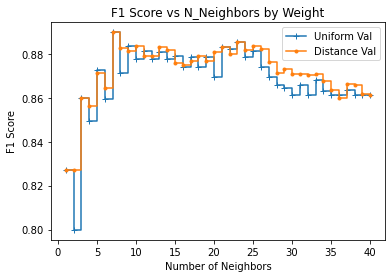

In [35]:
# Max neighbors
max_n = 41

train_uniform = []
test_uniform = []
train_distance = []
test_distance = []

for i in range(1, max_n):
    # Uniform
    scores = cross_validate(estimator=KNeighborsClassifier(n_neighbors=i,
                                                           weights='uniform',
                                                           p=1),
                            X=X_train, 
                            y=y_train,
                            scoring='f1',
                            return_train_score=True,
                            return_estimator=True,
                            n_jobs=-1)

    # Append scores
    train_uniform.append(scores['train_score'].mean())
    test_uniform.append(scores['test_score'].mean())
    
    # Distance
    scores = cross_validate(estimator=KNeighborsClassifier(n_neighbors=i,
                                                           weights='distance',
                                                           p=1),
                            X=X_train, 
                            y=y_train,
                            scoring='f1',
                            return_train_score=True,
                            return_estimator=True,
                            n_jobs=-1)

    # Append scores
    train_distance.append(scores['train_score'].mean())
    test_distance.append(scores['test_score'].mean())

# Plot Scores
fig, ax = plt.subplots()
ax.set_xlabel('Number of Neighbors')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score vs N_Neighbors by Weight')

#ax.plot(list(range(1,max_n)), train_uniform, marker="+", label="Uniform Train", drawstyle="steps-post")
#ax.plot(list(range(1,max_n)), train_distance, marker=".", label="Distance Train", drawstyle="steps-post")
ax.plot(list(range(1,max_n)), test_uniform, marker="+", label="Uniform Val", drawstyle="steps-post")
ax.plot(list(range(1,max_n)), test_distance, marker=".", label="Distance Val", drawstyle="steps-post")

ax.legend()
plt.show()

### Weights

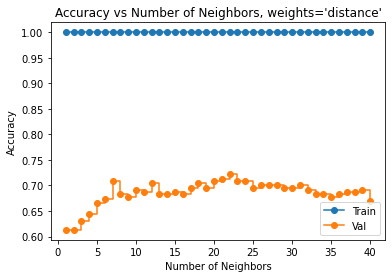

Best Accuracy: 0.722
Best N: 22



In [7]:
# Max neighbors
max_n = 41

# Entropy
train_acc = []
val_acc = []

for i in range(1, max_n):
    clf = KNeighborsClassifier(n_neighbors=i, weights='distance').fit(X_train, y_train)

    # Append scores
    train_acc.append(clf.score(X_train, y_train))
    val_acc.append(clf.score(X_val, y_val))
    
# Plot scores
fig, ax = plt.subplots()
ax.set_xlabel("Number of Neighbors")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Number of Neighbors, weights='distance'")
ax.plot(list(range(1,max_n)), train_acc, marker="o", label="Train", drawstyle="steps-post")
ax.plot(list(range(1,max_n)), val_acc, marker="o", label="Val", drawstyle="steps-post")
ax.legend()
plt.show()

# Print Best Score
print(f'Best Accuracy: {max(val_acc):.3f}')
print(f'Best N: {np.argmax(val_acc) + 1}')
print()

### Leaf Size

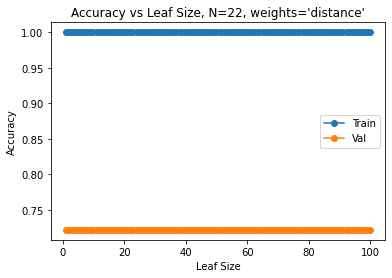

Best Accuracy: 0.722
Best N: 1



In [8]:
max_leaf_size = 101

# Entropy
train_acc = []
val_acc = []

for i in range(1, max_leaf_size):
    clf = KNeighborsClassifier(n_neighbors=22, 
                               weights='distance',
                               leaf_size=i).fit(X_train, y_train)

    # Append scores
    train_acc.append(clf.score(X_train, y_train))
    val_acc.append(clf.score(X_val, y_val))
    
# Plot scores
fig, ax = plt.subplots()
ax.set_xlabel("Leaf Size")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Leaf Size, N=22, weights='distance'")
ax.plot(list(range(1,max_leaf_size)), train_acc, marker="o", label="Train", drawstyle="steps-post")
ax.plot(list(range(1,max_leaf_size)), val_acc, marker="o", label="Val", drawstyle="steps-post")
ax.legend()
plt.show()

# Print Best Score
print(f'Best Accuracy: {max(val_acc):.3f}')
print(f'Best N: {np.argmax(val_acc) + 1}')
print()